In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.model_selection import StratifiedKFold


In [3]:
#read data
df = pd.read_csv('wine_drop_nan.csv', sep=',')
df.columns = ['Class', 'Alc', 'mAcid', 'Ash', 'alcAsh', 'Magn',
                    'totPhen', 'Flav', 'nonFlavPhen', 'Proant',
                    'colorInt', 'Hue', 'OD280', 'Prol']

features = ['Alc', 'mAcid', 'Ash', 'alcAsh', 'Magn',
                'totPhen', 'Flav', 'nonFlavPhen', 'Proant',
                'colorInt', 'Hue', 'OD280', 'Prol']

In [4]:
#data exploration

print("\nChecking for null values:")
print(df.isnull().sum())
print("\n-----------------")
print("\nChecking basic statistics")
print(df.describe())
print("\n-----------------")
print("\nCheck the column types")
print(df.dtypes)
print("\n-----------------\n")


Checking for null values:
Class          0
Alc            0
mAcid          0
Ash            0
alcAsh         0
Magn           0
totPhen        0
Flav           0
nonFlavPhen    0
Proant         0
colorInt       0
Hue            0
OD280          0
Prol           0
dtype: int64

-----------------

Checking basic statistics
            Class         Alc       mAcid         Ash      alcAsh        Magn  \
count  167.000000  167.000000  167.000000  167.000000  167.000000  167.000000   
mean     1.940120   12.982874    2.321317    2.366108   19.489222   99.610778   
std      0.773823    0.812775    1.118567    0.273771    3.354336   14.480502   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.335000    1.585000    2.210000   17.200000   88.000000   
50%      2.000000   13.030000    1.870000    2.360000   19.500000   98.000000   
75%      3.000000   13.675000    3.010000    2.555000   21.500000  107.000000   
max      3.000000   14.83000

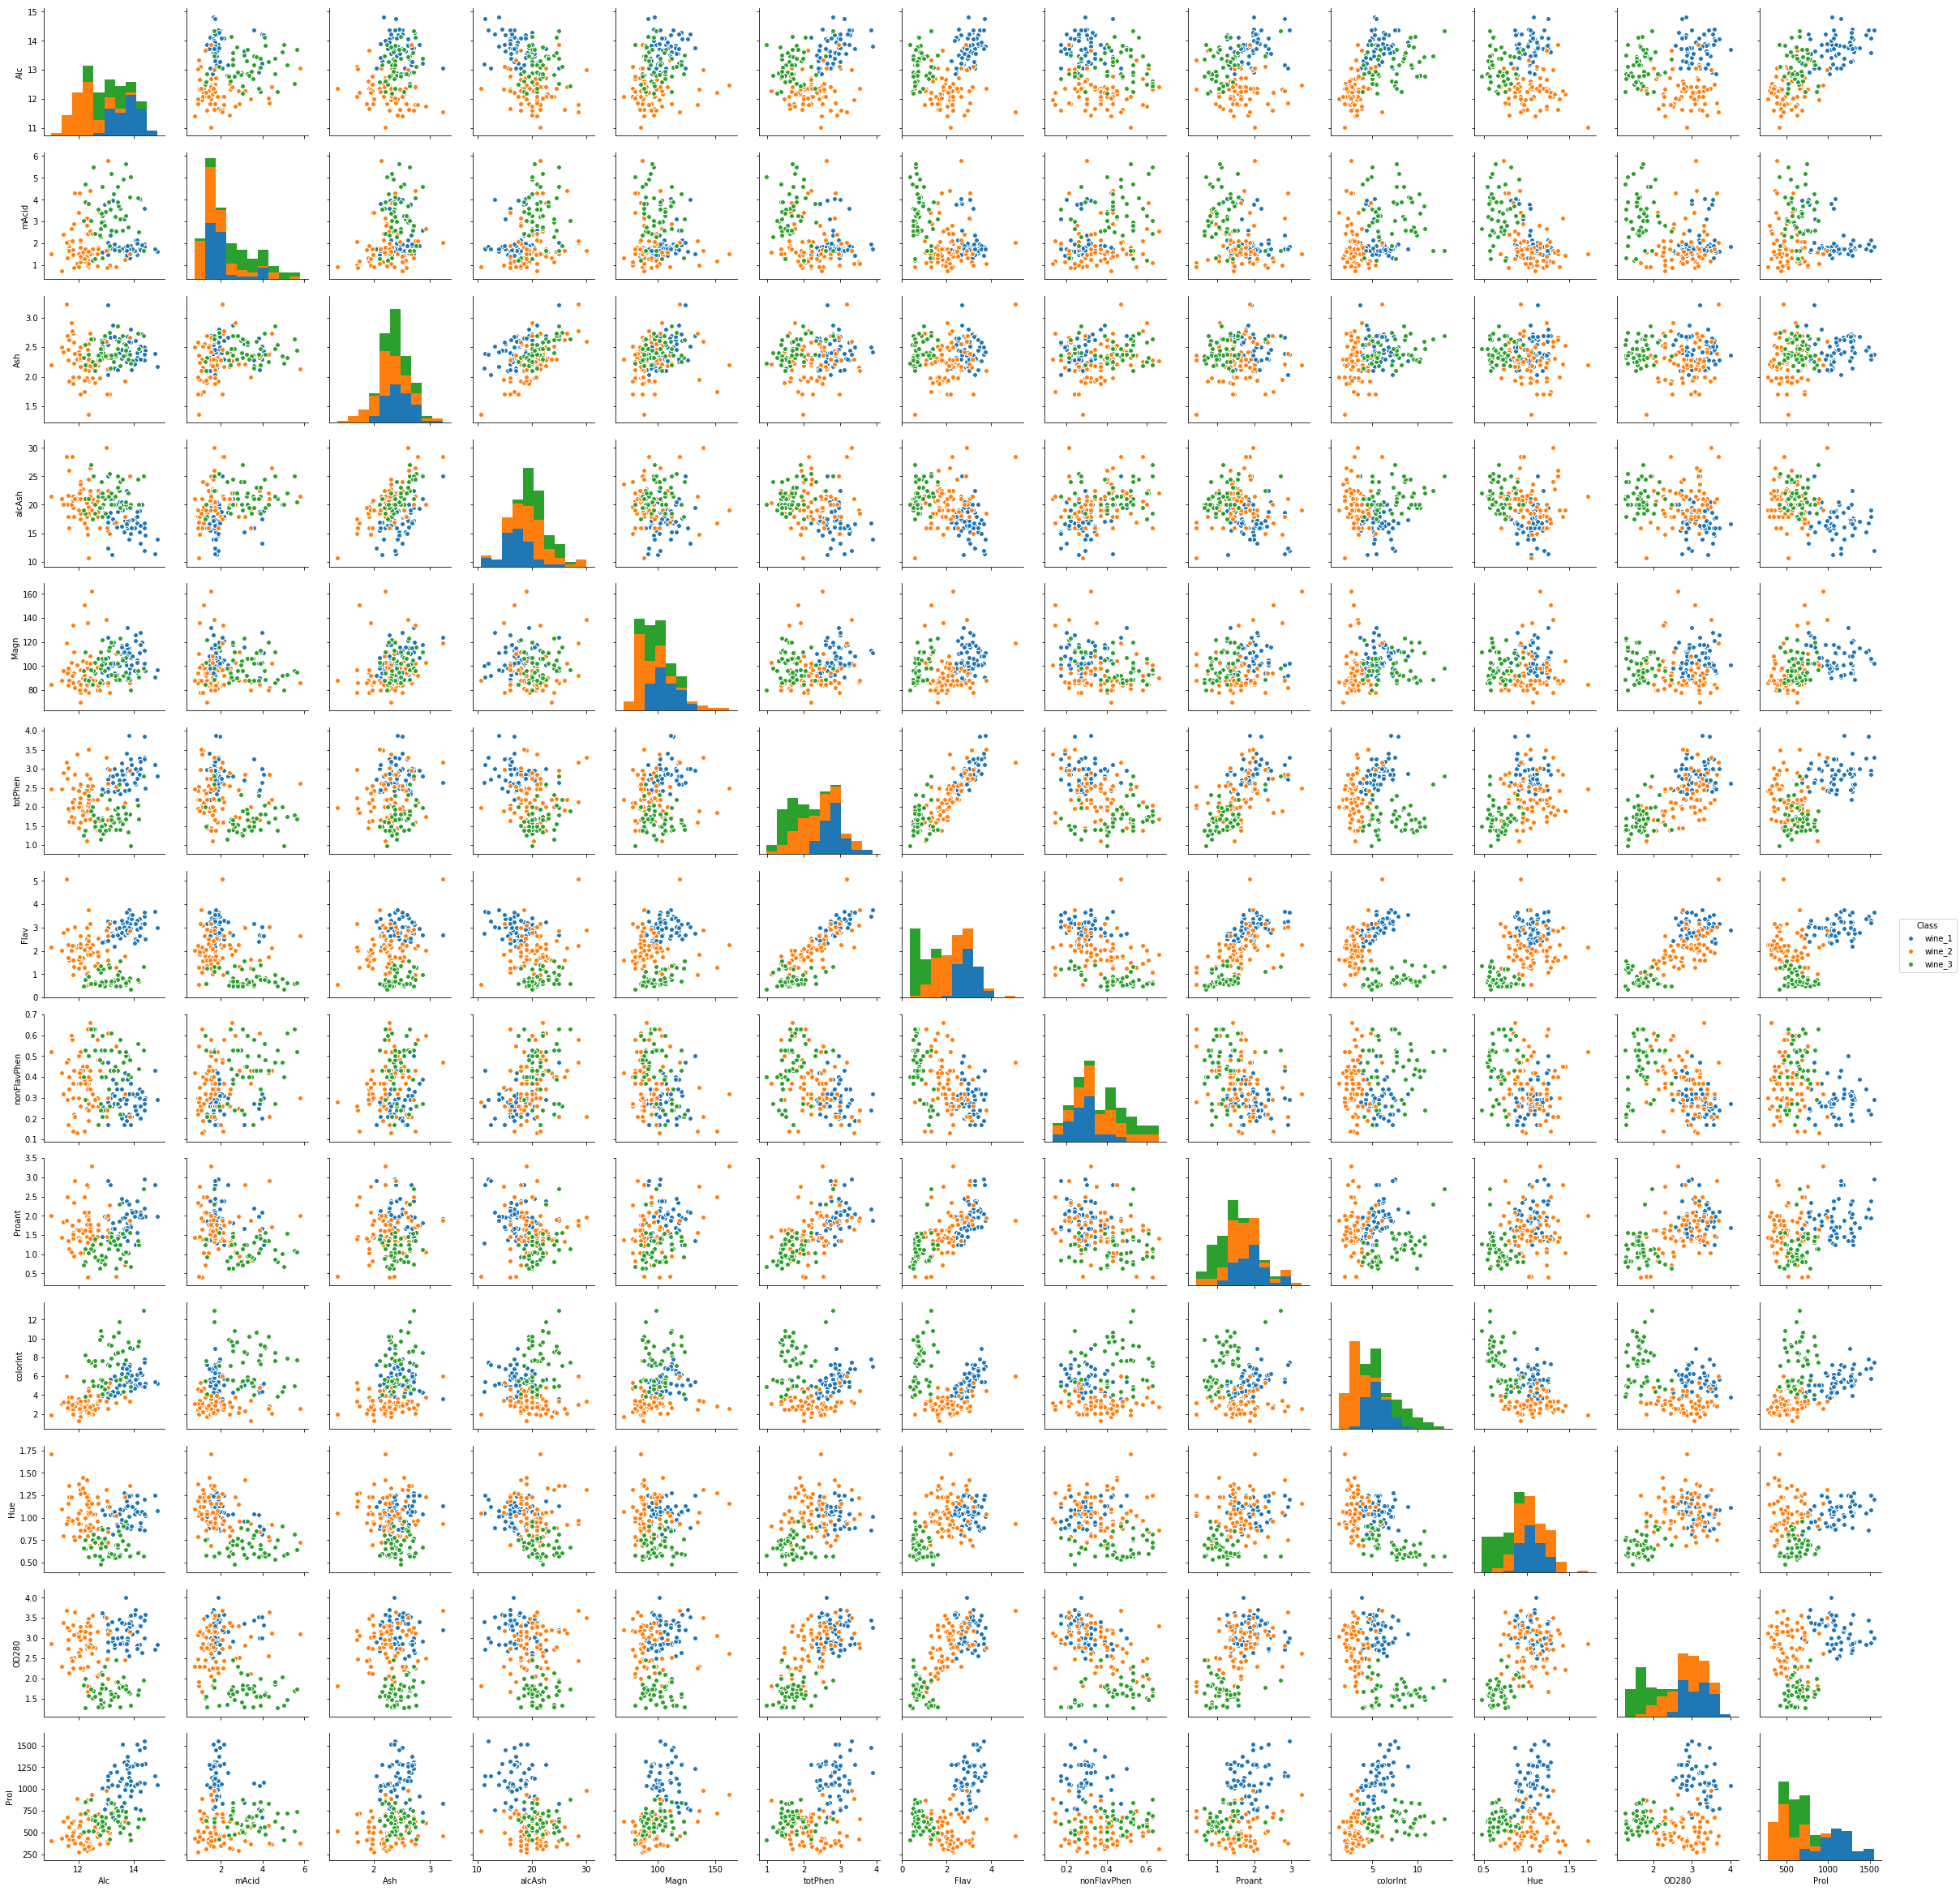

In [5]:
#print pairplot
y = pd.Series(['wine_1', 'wine_2', 'wine_3'], index=[1, 2, 3])

df['Class'] = df['Class'].map(y)

allFeaturesPlot = sns.pairplot(df, hue='Class')
plt.show()


In [6]:
def store_dataset_as_np(df):

    features = ['Alc', 'mAcid', 'Ash', 'alcAsh', 'Magn',
                'totPhen', 'Flav', 'nonFlavPhen', 'Proant',
                'colorInt', 'Hue', 'OD280', 'Prol']

    x = df.loc[:, features].values
    y = df.loc[:, ['Class']].values
    return x, y


The Decision Tree Accuracy without PCA is: 0.96
The Decision Tree Accuracy with PCA is: 0.97


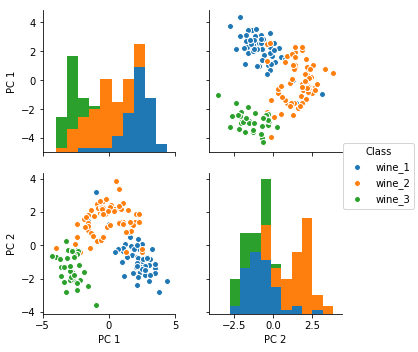

In [7]:
y = pd.Series([1, 2, 3], index=['wine_1', 'wine_2', 'wine_3'])

df['Class'] = df['Class'].map(y)
x, y = store_dataset_as_np(df)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
decTree = tree.DecisionTreeClassifier()

decTree = decTree.fit(x_train, y_train)

print("The Decision Tree Accuracy without PCA is: %.2f" % decTree.score(x_test, y_test))

    # Normalizing the dataset before applying PCA
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
    # Applying PCA
principalComponents = pca.fit_transform(x)
    # Now the dataset has only 2 components, that represents 2 ortogonal axis generated by a combination of the previous features

x_train, x_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.4, random_state=0)

    # CLASSIFIER WITH PCA

decTree = tree.DecisionTreeClassifier()

decTree = decTree.fit(x_train, y_train)

print("The Decision Tree Accuracy with PCA is: %.2f" % decTree.score(x_test, y_test))

    # transform the data into a pandas dataset to use in pairplot

pw = pd.DataFrame(data=principalComponents, columns=['PC 1', 'PC 2'])

pw = pd.concat([pw, df[['Class']]], axis=1)
y = pd.Series(['wine_1', 'wine_2', 'wine_3'], index=[1, 2, 3])

pw['Class'] = pw['Class'].map(y)

allFeaturesPlot = sns.pairplot(pw, hue='Class')
plt.show()

y = pd.Series([1, 2, 3], index=['wine_1', 'wine_2', 'wine_3'])

pw['Class'] = pw['Class'].map(y)